In [260]:
import pandas as pd
import numpy as np
import tqdm

In [261]:
import os
import sys
path = '/'.join(os.path.abspath('').split('/')[0:-2])
print(path)
sys.path.append(path)

/home/mora/Documents/projects/bandits


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot: >

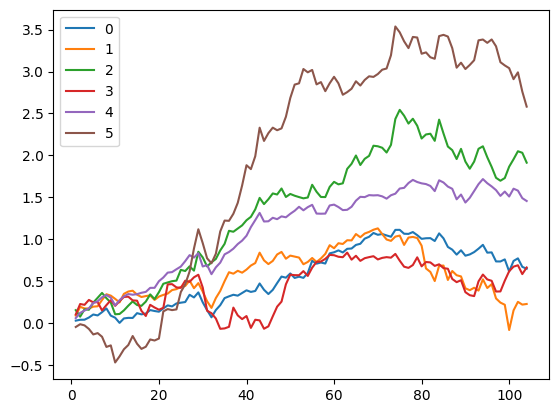

In [262]:
from data.yahoo import yahoo

# Set the start and end date
start_date = '2019-01-01'
end_date = '2023-01-01'
 
# Set the ticker
tickers = ['GOOGL','META','NVDA', 'GE', 'AAPL','TSLA']
interval = '2W'
y = yahoo(tickers)
y.pull_data(start_date, end_date)

df_bandits = y.pct_change(interval)
df_bandits.cumsum().plot()

In [263]:
pd.set_option('display.max_rows', None)

In [264]:
from experts.alpha import alpha
from exploration.explore import explore
from exploration.outils import stats

import numba as nb

In [265]:
arguments = {"exploration_rate": 0.05,
             "n_bandit":df_bandits.shape[1],
             "steps":df_bandits.shape[0],
             "alpha":2,
             "df_bandits":df_bandits
            }

lines = []
 
alp = np.arange(0.025,1,0.025)
EXPL = np.arange(0.05,0.8,0.05)

def grid_search(alp, EXPL, arguments):
    
    for a in alp:
        
        arguments['alpha'] = a
        
        for expl in EXPL:
            
            arguments['exploration_rate'] = expl
            exp = explore(alpha.execute)
            exp.execute(100, **arguments)
            mean, std = stats(exp.rets_compo)
            line = [a, expl, mean, std]
            lines.append(line)
    
    return lines

In [266]:
lines = grid_search(alp, EXPL, arguments)

In [267]:
df_expl = pd.DataFrame(lines)
df_expl.columns = ['alpha','exploration','mean','std']
#df_expl = df_expl[df_expl['exploration']>0].reset_index()
df_expl.sort_values(by='mean')

,alpha,exploration,mean,std
0,0.025,0.05,1.515158,1.787497
451,0.775,0.10,1.539426,1.571965
300,0.525,0.05,1.631365,1.994774
571,0.975,0.10,1.652662,1.332826
255,0.450,0.05,1.694218,1.927140
496,0.850,0.10,1.735651,1.553164
538,0.900,0.70,1.746340,1.509127
465,0.800,0.05,1.747181,1.725980
236,0.400,0.60,1.749482,1.825825
270,0.475,0.05,1.753376,1.996141


In [268]:
import plotly.express as px
df = px.data.iris()

fig = px.density_heatmap(df_expl, x="alpha", y="exploration", z="mean",
                         histfunc="avg", nbinsx = len(alp),
                         nbinsy = len(EXPL)
                        )
fig.show()

In [269]:
fig.write_html("/home/mora/Documents/projects/bandits/notebooks/Basket_1/stocks_1_alpha.html")

In [270]:
exp = explore(alpha.execute)

In [271]:
arguments = {"exploration_rate": 0.1,
             "n_bandit":df_bandits.shape[1],
             "steps":df_bandits.shape[0],
             "alpha":0.2,
             "df_bandits":df_bandits
            }

exp.execute(100, **arguments)

In [272]:
mean, std = stats(exp.rets_compo)

In [273]:
mean

2.785344006882339